<a href="https://colab.research.google.com/github/data-better/RBOK/blob/main/RBOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. R의 소개

* 무료로 사용하는 데이터분석 소프트웨어 : R, Python
* R의 설치 : https://r-project.org
* R 개발환경 : Rstudio / Python 개발환경 : anaconda 
* 클라우드 기반 쥬피터 노트북 : 구글 Colab



## 2. 구글 Colab

* 구글 id가 있어야 이용 가능, 구글 drive 이용
* 텍스트와 코드로 구성 
  - 텍스트 작성 : 마크다운
  - 코드 수행 : Crtl+Enter, Shift+Enter, Alt+Enter 
* 크롬 브라우저에서 Python과 R을 실행 : R은 임시
  - 설치 필요하지 않음
  - GPU 무료 액세스
* Pyhon 기반 : https://colab.research.google.com/
* R : https://colab.research.google.com/notebook#create=true&language=r

## 3. R의 특징
  * Colab 환경 검토 : R.Version()
  * 설치된 library : library()
  * 설치된 data    : data()


In [ ]:
R.Version()

In [ ]:
library()

In [ ]:
help(package='base')

In [ ]:
data()

In [ ]:
?Syntax

In [ ]:
options()

$add.smooth
[1] TRUE

$bitmapType
[1] "cairo"

$browser
[1] "xdg-open"

$browserNLdisabled
[1] FALSE

$callr.condition_handler_cli_message
function (msg) 
{
    custom_handler <- getOption("cli.default_handler")
    if (is.function(custom_handler)) {
        custom_handler(msg)
    }
    else {
        cli_server_default(msg)
    }
}
<bytecode: 0x5653b5533a48>
<environment: namespace:cli>

$CBoundsCheck
[1] FALSE

$check.bounds
[1] FALSE

$citation.bibtex.max
[1] 1

$continue
[1] "+ "

$contrasts
        unordered           ordered 
"contr.treatment"      "contr.poly" 

$cpp11_preserve_env
<environment: 0x5653b78d7bd0>

$crayon.enabled
[1] TRUE

$defaultPackages
[1] "datasets"  "utils"     "grDevices" "graphics"  "stats"     "methods"  

$demo.ask
[1] "default"

$deparse.cutoff
[1] 60

$device
function (filename = null_filename, ...) 
ok_device(filename, ...)
<bytecode: 0x5653b1fbf690>
<environment: 0x5653b1fbf230>

$device.ask.default
[1] FALSE

$digits
[1] 7

$dplyr.show_progress
[1]

## 4. R 기초

In [ ]:
# 계산과 변수 지정

1+2
a = 10
b <- 2
a+b

[1] 3

[1] 12

In [ ]:
# 데이터 형태
a1 = c(1,2,5)
print(a1)
b1 <- c(1,2, 'aa', TRUE)
print(b1)
c1 <- matrix(1:12, 4,3)
print(c1)

[1] 1 2 5
[1] "1"    "2"    "aa"   "TRUE"
     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12


## 5. 데이터 읽어오기

In [85]:
library(tidyverse)

In [86]:
dataq = read_csv("https://raw.githubusercontent.com/data-better/RBOK/main/data/BOK_DATA_Q.csv")


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  date = col_date(format = ""),
  cp_sa = col_double(),
  gdp_sa = col_double(),
  cp = col_double(),
  gdp = col_double(),
  ipi = col_double(),
  ipi_sa = col_double(),
  conpi = col_double(),
  conpi_sa = col_double(),
  sbi = col_double(),
  sbi_sa = col_double(),
  pubpi = col_double(),
  pubpi_sa = col_double(),
  cpi = col_double(),
  cpi_core = col_double()
)




In [ ]:
dataq = dataq %>% 
  mutate(gdp_sa_p = (gdp_sa - lag(gdp_sa)) / lag(gdp_sa) * 100,
          gdp_p    = (gdp    - lag(gdp, 4)) / lag(gdp, 4) * 100,
          cpi_p    = (gdp    - lag(cpi, 4)) / lag(cpi, 4) * 100
          )
dataq

In [ ]:
# dataq_ts = ts(dataq, start=1985, frequency=4)
dataq_ts = dataq %>% ts(start=1985, frequency=4)
dataq_ts

## 6. 데이터 시각화

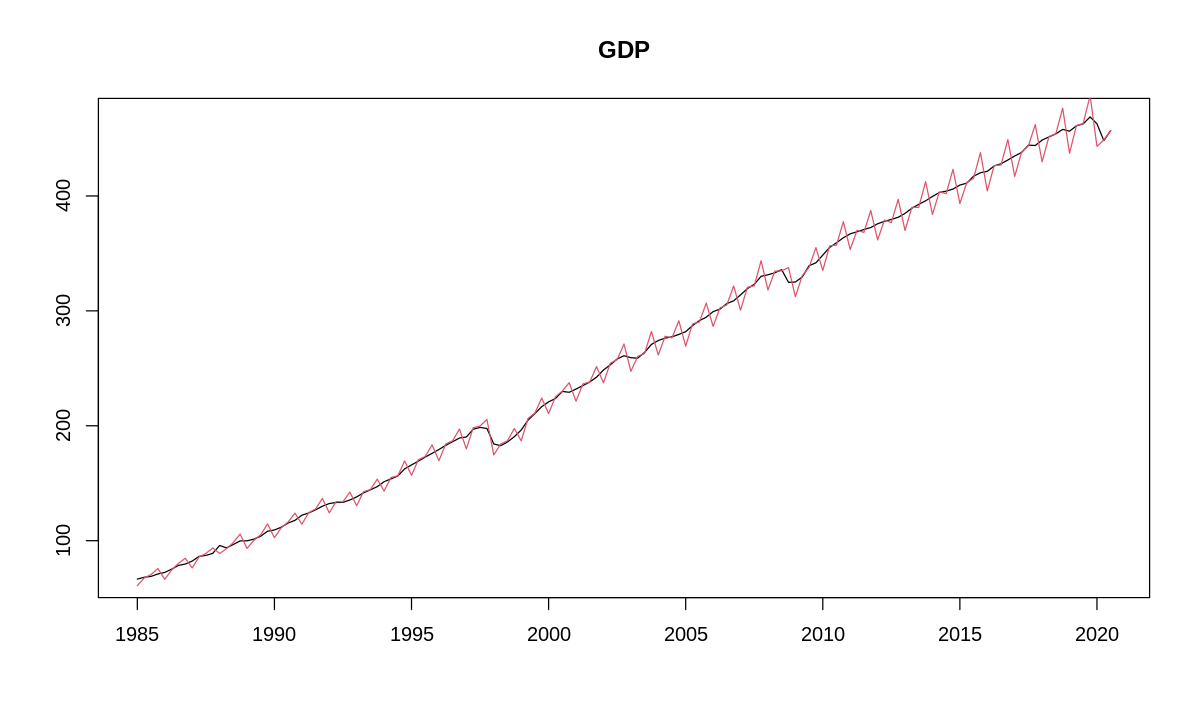

In [107]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot(dataq_ts[,3]/1000, xlab="", ylab="", main="GDP")
 lines(dataq_ts[,5]/1000, col=2)

In [102]:
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



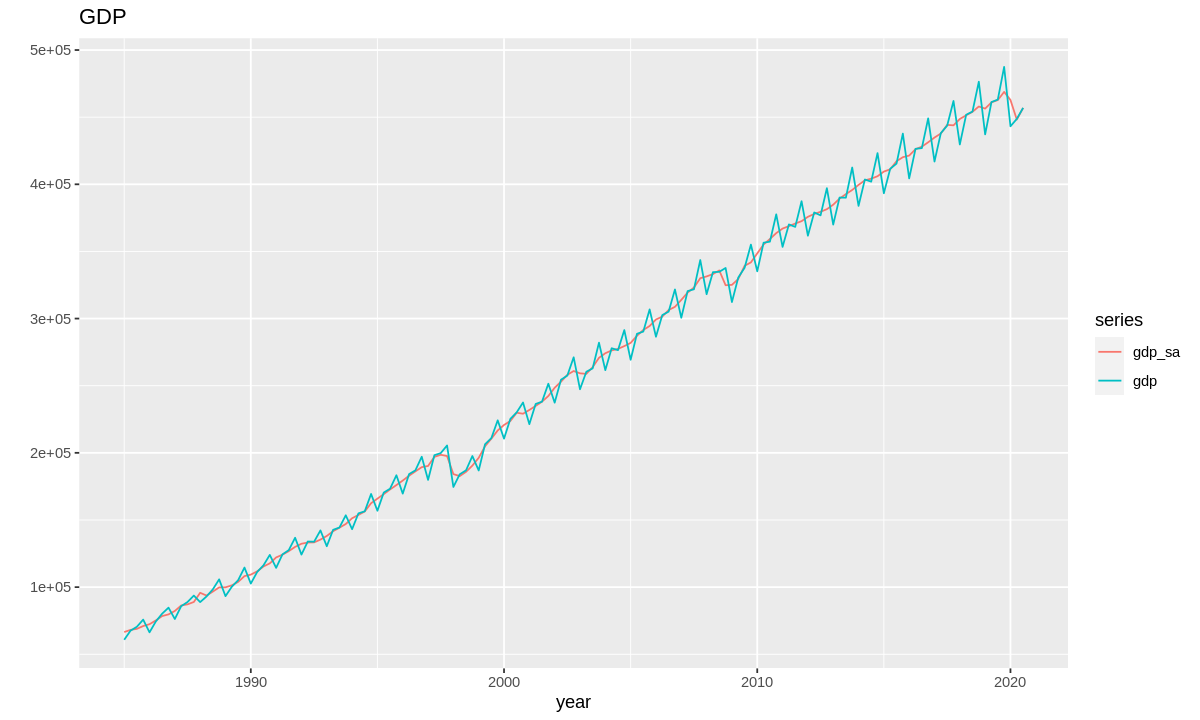

In [104]:
autoplot(dataq_ts[, c(3,5)])+
  ggtitle("GDP") +
  ylab("") +
  xlab("year")

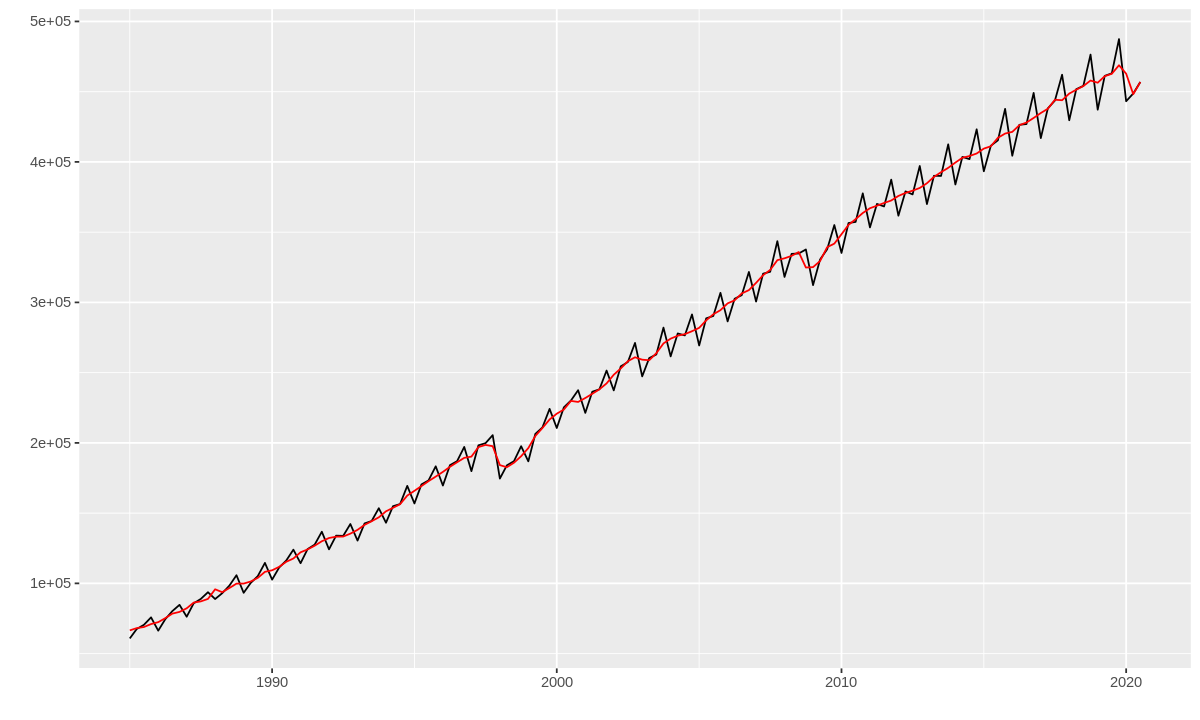

In [121]:
dataq %>% ggplot(aes(date)) +
          geom_line(aes(y=gdp)) +
          geom_line(aes(y=gdp_sa), color="red") +
          labs(x="", y="") 

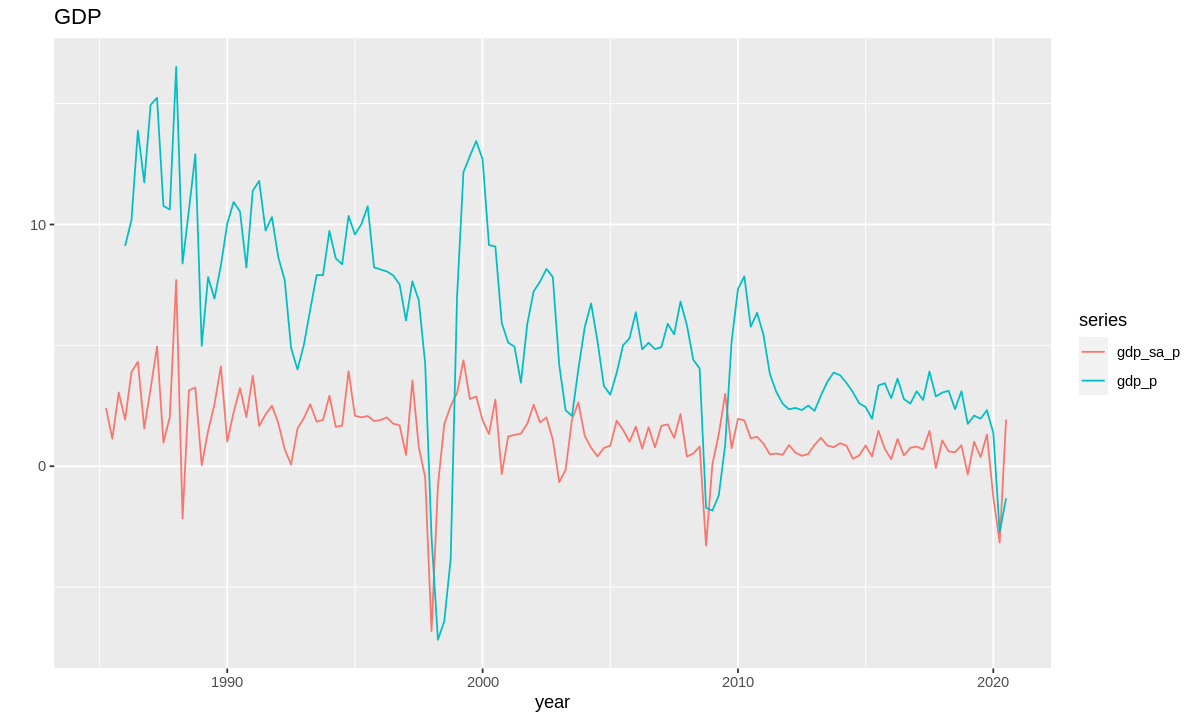

In [105]:
autoplot(dataq_ts[, c(16,17)])+
  ggtitle("GDP") +
  ylab("") +
  xlab("year")

## 7. 시계열의 분해

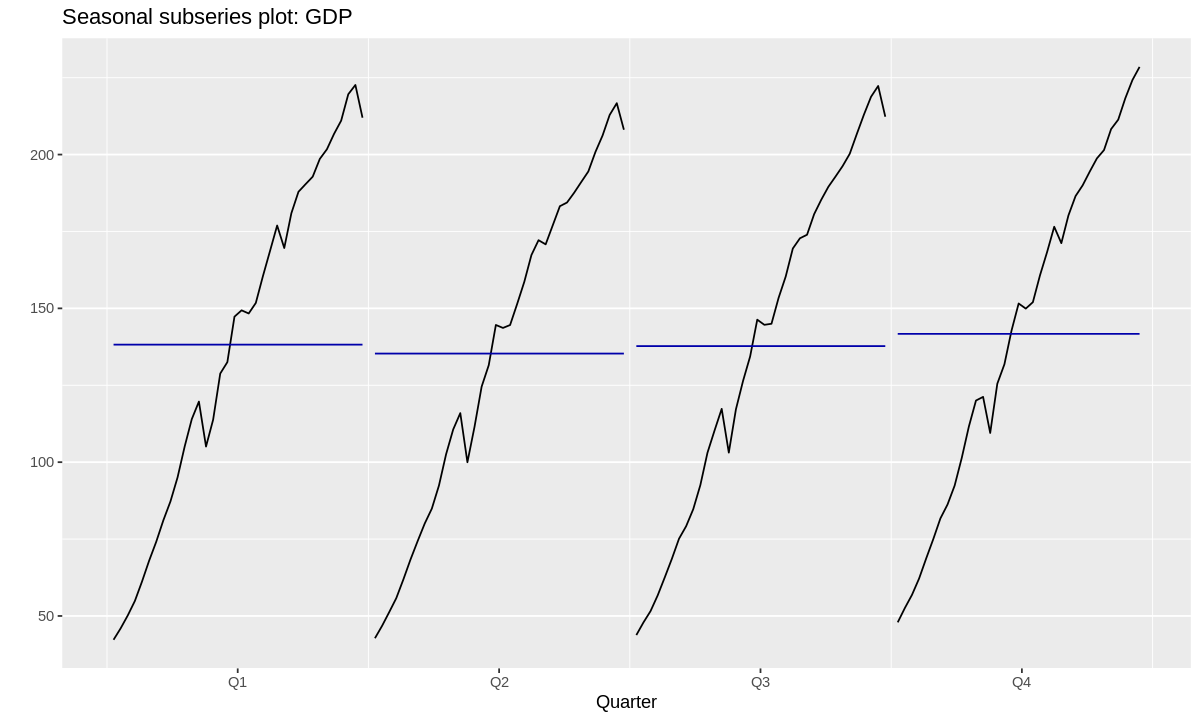

In [106]:
# GDP의 계절성
ggsubseriesplot(dataq_ts[,4]/1000) +
  ylab("") +
  ggtitle("Seasonal subseries plot: GDP")

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 20 row(s) containing missing values (geom_path).”


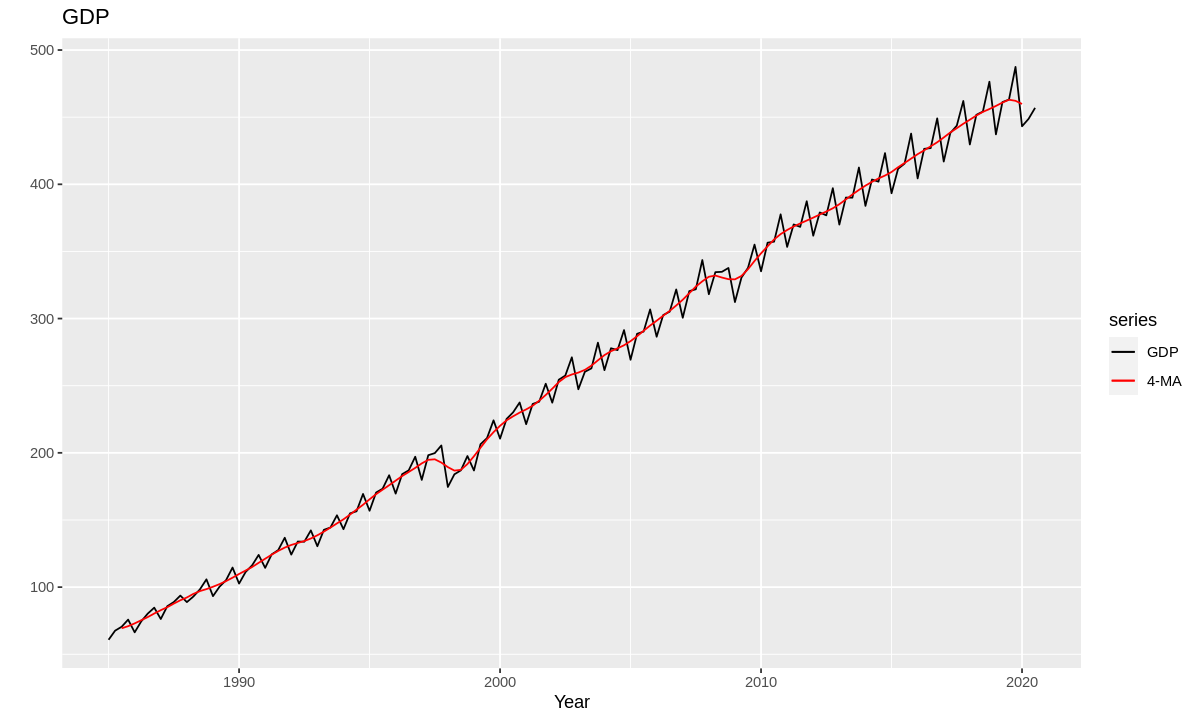

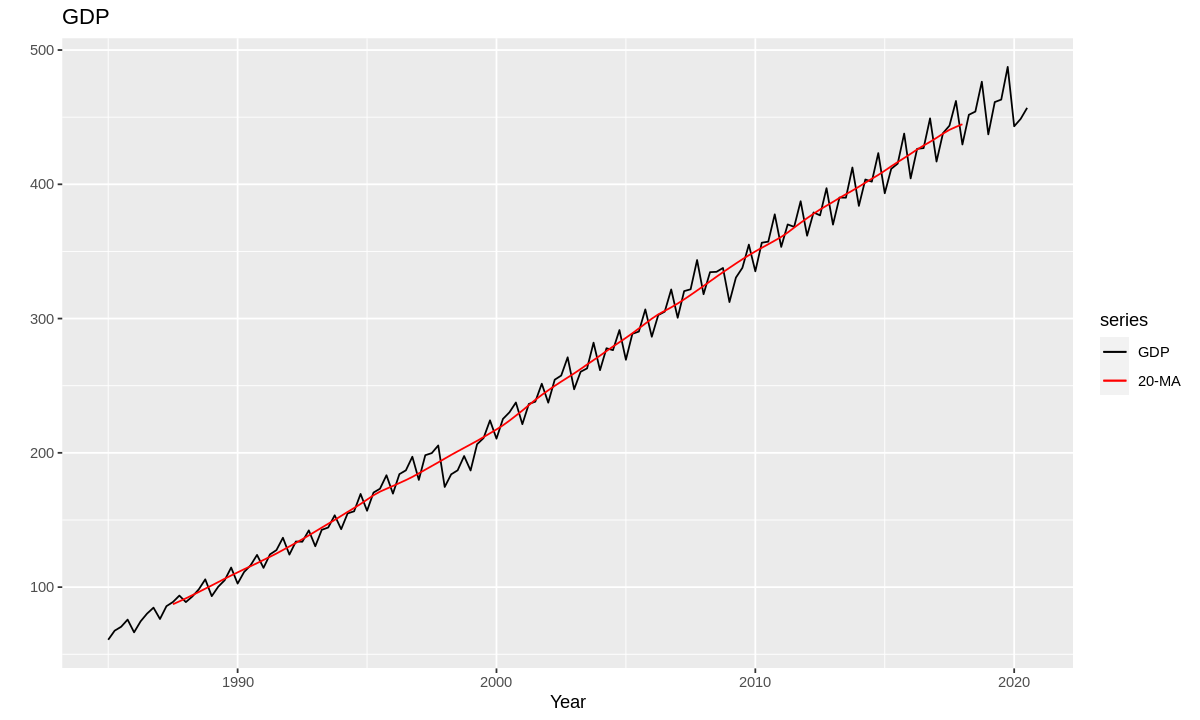

In [131]:
# 4분기 이동평균
GDP_SA = dataq_ts[,3]/1000
GDP = dataq_ts[,5]/1000
autoplot(GDP, series="GDP") +
  autolayer(ma(GDP, 4), series="4-MA") +
  xlab("Year") + ylab("") +
  ggtitle("GDP") +
  scale_colour_manual(values=c("GDP"="black","4-MA"="red"),
                      breaks=c("GDP","4-MA"))
# 40분기 이동평균
autoplot(GDP, series="GDP") +
  autolayer(ma(GDP, 20), series="20-MA") +
  xlab("Year") + ylab("") +
  ggtitle("GDP") +
  scale_colour_manual(values=c("GDP"="black","20-MA"="red"),
                      breaks=c("GDP","20-MA"))

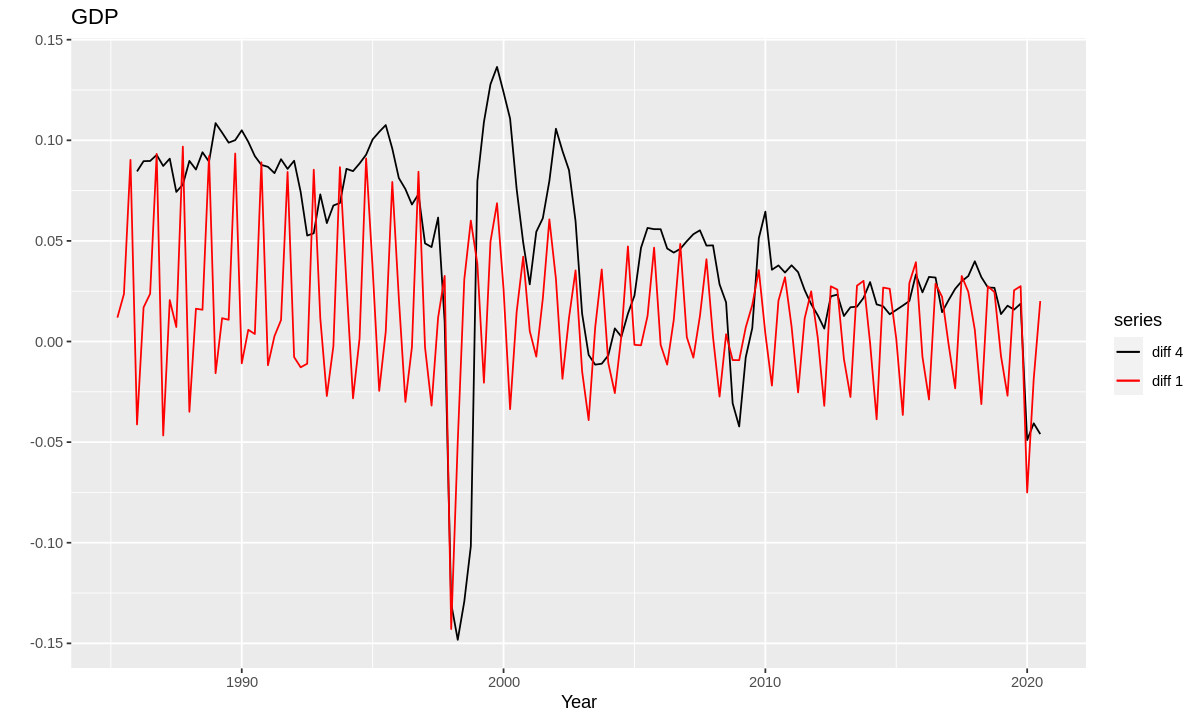

In [127]:
# 차분
autoplot(diff(log(GDP),4), series="diff 4") +
  autolayer(diff(log(GDP)), series="diff 1") +
  xlab("Year") + ylab("") +
  ggtitle("GDP") +
  scale_colour_manual(values=c("diff 4"="black","diff 1"="red"),
                      breaks=c("diff 4","diff 1"))

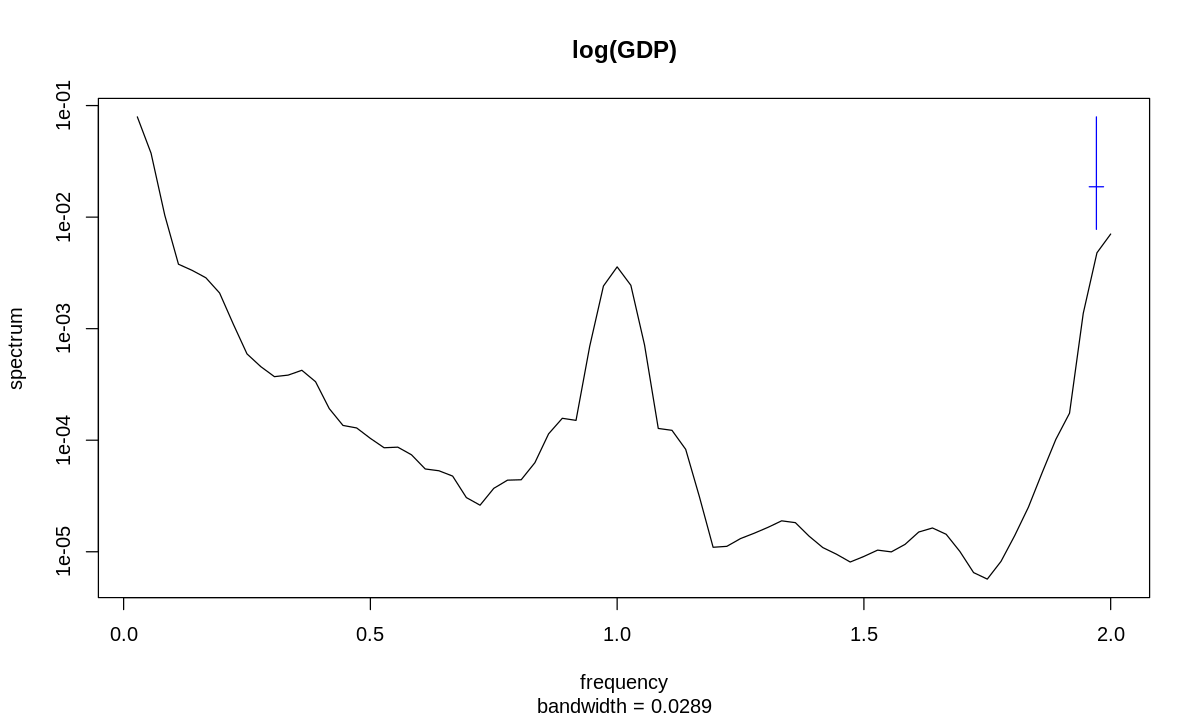

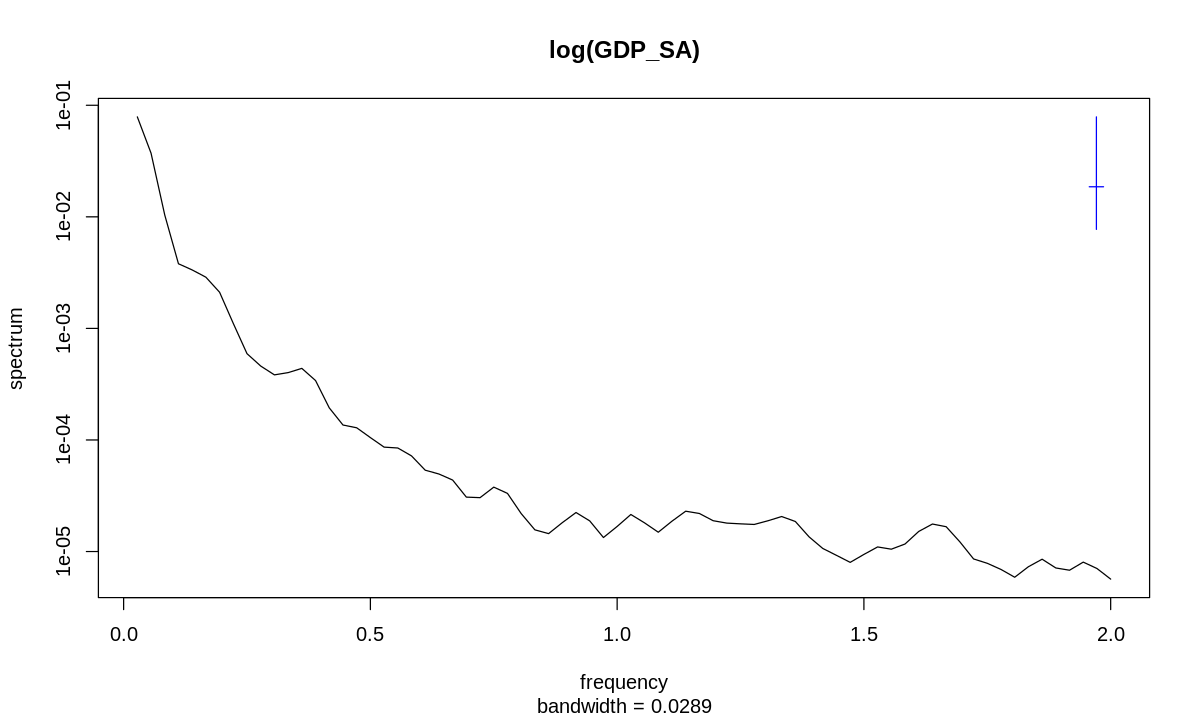

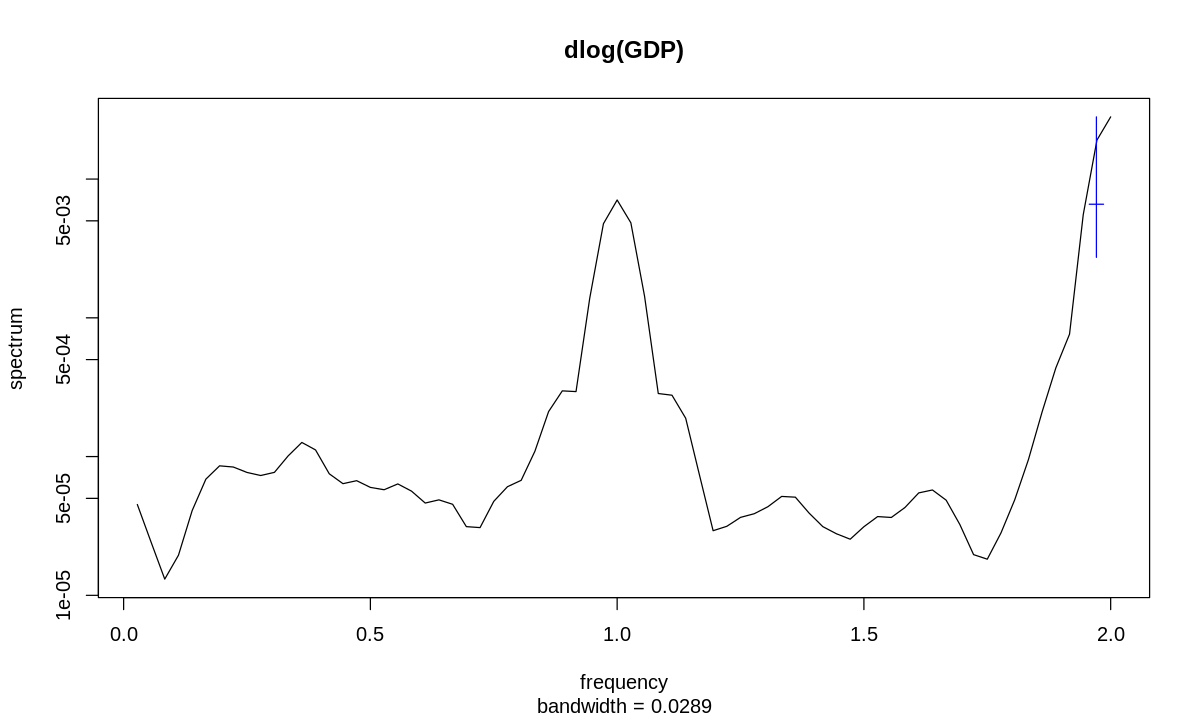

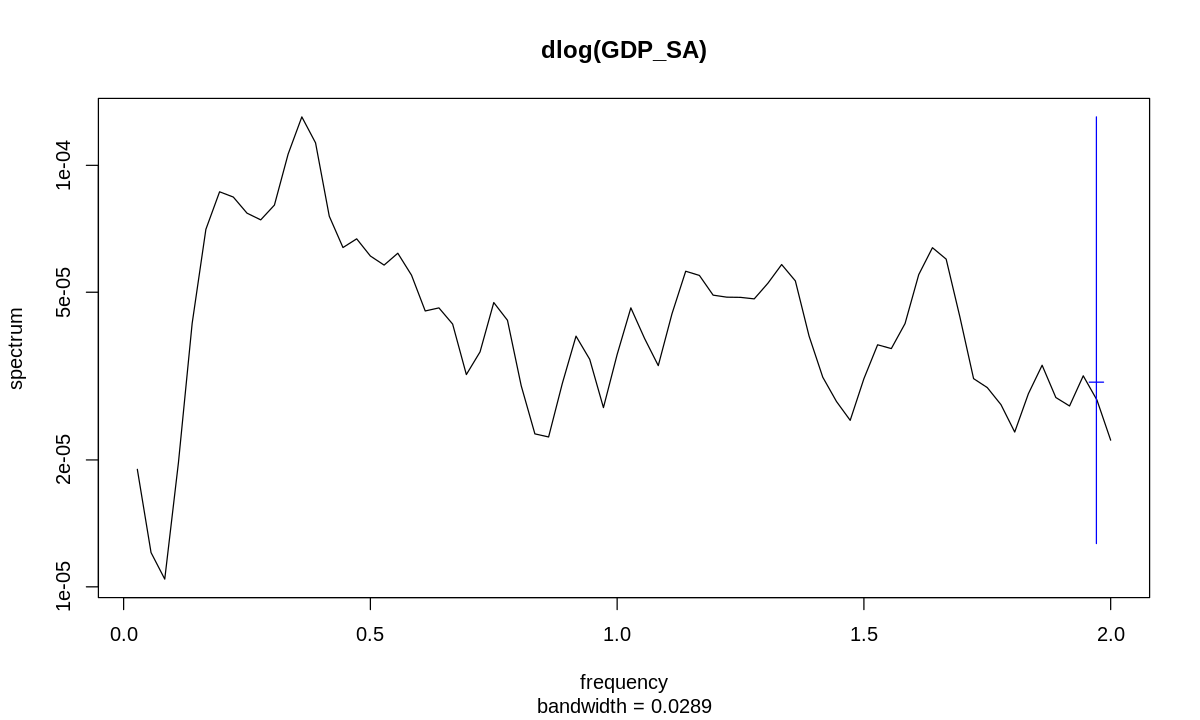

In [145]:
spectrum(log(GDP), spans=c(3,3), main="log(GDP)")
spectrum(log(GDP_SA), spans=c(3,3), main="log(GDP_SA)" )
spectrum(diff(log(GDP)), spans=c(3,3), main="dlog(GDP)")
spectrum(diff(log(GDP_SA)), spans=c(3,3), main="dlog(GDP_SA)")

## 7. 시계열의 분해

In [149]:
install.packages("mFilter")
library(mFilter)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [159]:
lgdp.hp = mFilter(log(GDP_SA),filter="HP")   # Hodrick-Prescott filter
 gdp_t = exp(lgdp.hp$trend)
 gdpsam = exp(ma(log(GDP_SA),3))
 gdp_s = GDP/GDP_SA*100
 gdp_i = GDP_SA/gdpsam*100
 gdp_c = gdpsam/gdp_t*100

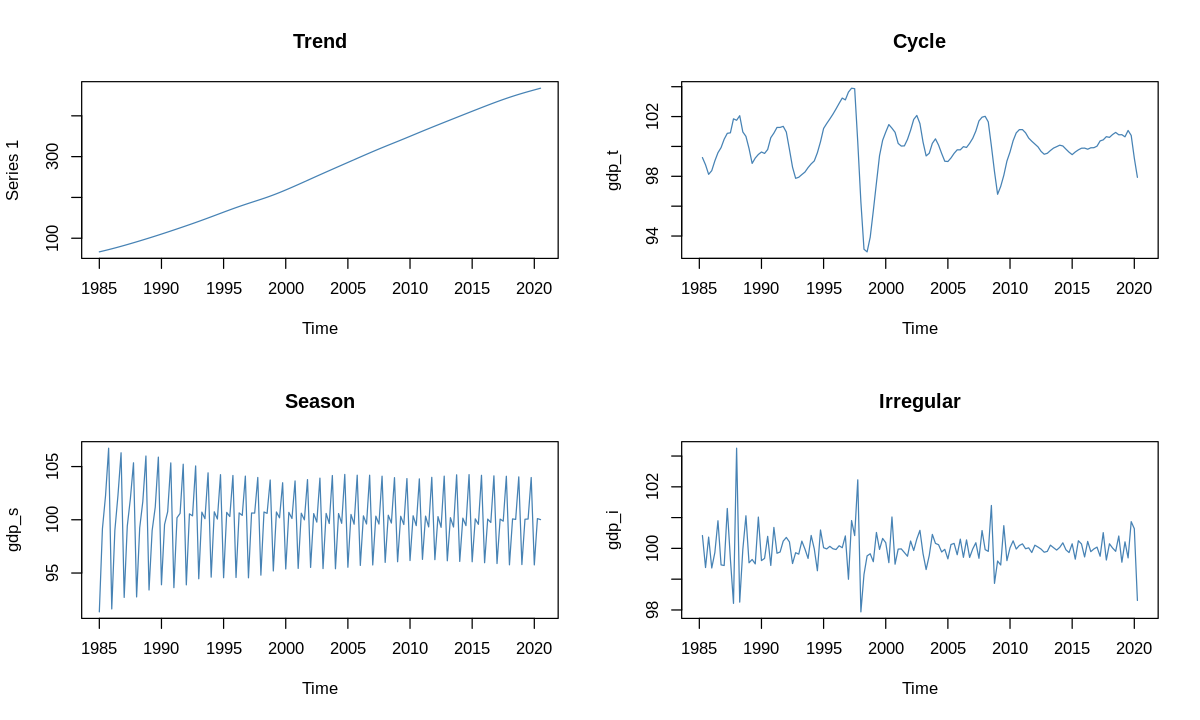

In [161]:
par(mfrow=c(2,2))
plot(gdp_t, main="Trend", col="steelblue")
plot(gdp_c, main="Cycle", col="steelblue")
plot(gdp_s, main="Season", col="steelblue")
plot(gdp_i, main="Irregular", col="steelblue")
par(mfrow=c(1,1))

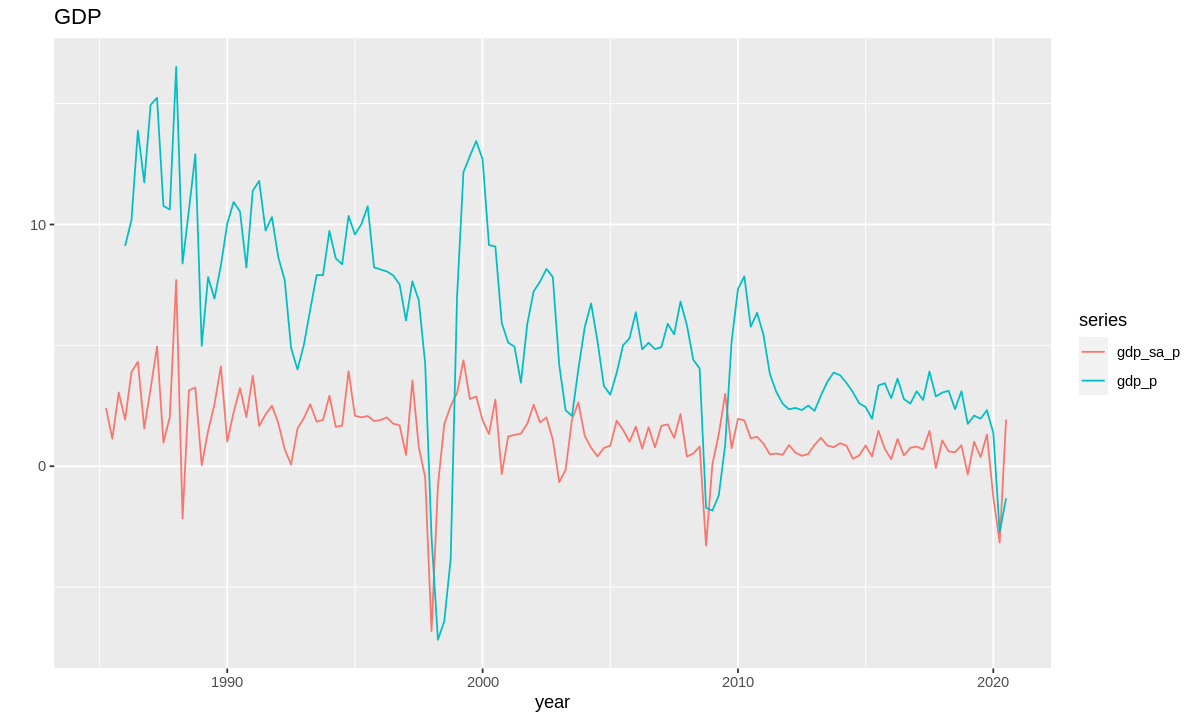

In [162]:
autoplot(dataq_ts[, c(16,17)])+
  ggtitle("GDP") +
  ylab("") +
  xlab("year")

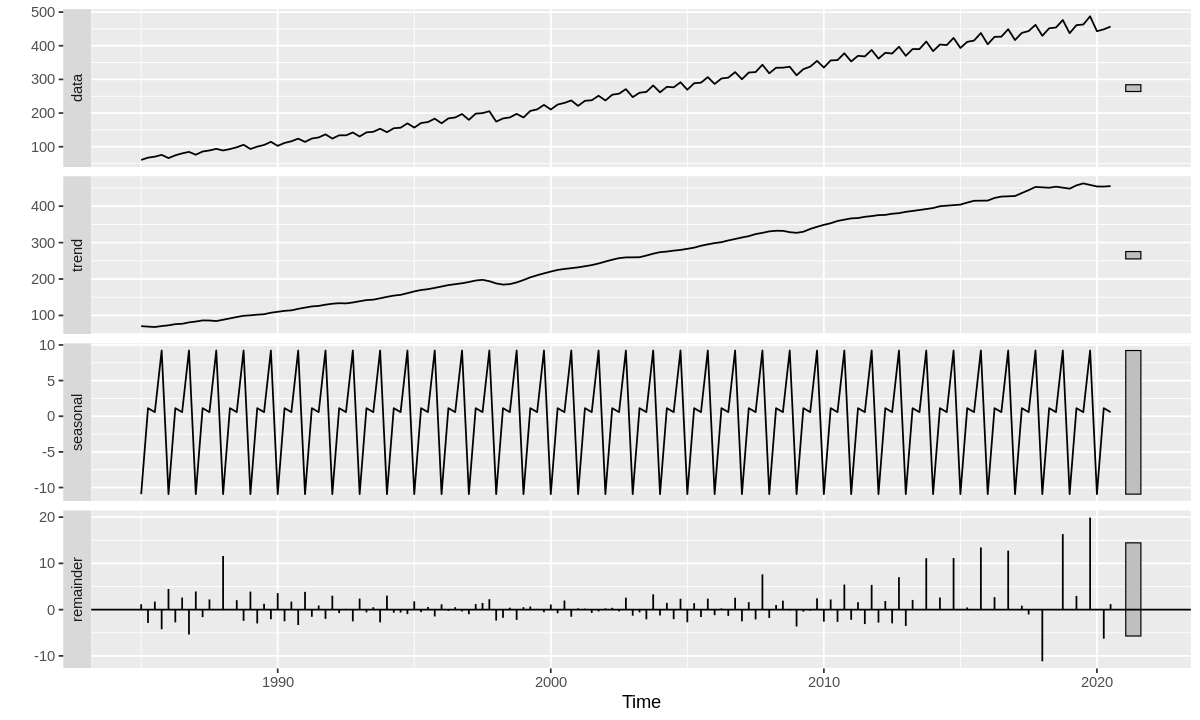

In [164]:
GDP %>%
  stl(t.window=5, s.window="periodic", robust=TRUE) %>%
  autoplot()

## 8. 시계열을 이용한 예측